In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import  ConfusionMatrixDisplay

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
import sys
sys.path.insert(0, '../')
from scripts.loader import cargar_modelo, cargar_scaler, cargar_PCA

modelo_recuperado = cargar_modelo("modelo_svm_recidiva")
scaler_recuperado = cargar_scaler("scaler_std_recidiva")
pca_recuperado = cargar_PCA("pca_recidiva")

In [5]:
relevant_cols = [
    "edad",
    "imc",
    "f_diag",
    "tipo_histologico",
    "Grado",
    "valor_de_ca125",
    "ecotv_infiltobj",
    "ecotv_infiltsub",
    "metasta_distan",
    "estadiaje_pre_i",
    "grupo_riesgo",
    "tto_NA",
    "fecha_qx",
    "asa",
    "histo_defin",
    "grado_histologi",
    "tamano_tumoral",
    "afectacion_linf",
    "AP_centinela_pelvico",
    "AP_ganPelv",
    "AP_glanPaor",
    "recep_est_porcent",
    "rece_de_Ppor",
    "beta_cateninap",
    "estudio_genetico_r01",
    "estudio_genetico_r02",
    "estudio_genetico_r03",
    "estudio_genetico_r04",
    "estudio_genetico_r05",
    "estudio_genetico_r06",
    "estadificacion_",
    "FIGO2023",
    "grupo_de_riesgo_definitivo",
    "bqt",
    "qt",
    "Tributaria_a_Radioterapia",
    "recidiva",
    "rdt",
]

In [6]:
data = pd.read_csv("../data_source/IQ_Cancer_Endometrio_merged_NMS.csv")
data_relevant = data[relevant_cols].copy()
data_relevant.head()

,edad,imc,f_diag,tipo_histologico,Grado,valor_de_ca125,ecotv_infiltobj,ecotv_infiltsub,metasta_distan,estadiaje_pre_i,grupo_riesgo,tto_NA,fecha_qx,asa,histo_defin,grado_histologi,tamano_tumoral,afectacion_linf,AP_centinela_pelvico,AP_ganPelv,AP_glanPaor,recep_est_porcent,rece_de_Ppor,beta_cateninap,estudio_genetico_r01,estudio_genetico_r02,estudio_genetico_r03,estudio_genetico_r04,estudio_genetico_r05,estudio_genetico_r06,estadificacion_,FIGO2023,grupo_de_riesgo_definitivo,bqt,qt,Tributaria_a_Radioterapia,recidiva,rdt
0,68.0,39.40,2023-11-03,2,2,283.0,4.0,2.0,1.0,2.0,3.0,0,16/11/2023,2.0,2.0,2.0,NaN,NaN,4.0,NaN,NaN,80.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,14.0,5.0,0.0,1.0,0.0,0,NaN
1,92.0,24.14,2019-10-24,1,1,NaN,3.0,4.0,0.0,NaN,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,72.0,38.80,2020-07-16,2,1,NaN,3.0,4.0,0.0,0.0,1.0,0,14/09/2020,2.0,2.0,1.0,2.0,1.0,4.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,NaN
3,78.0,36.30,2021-02-22,2,1,NaN,3.0,3.0,0.0,1.0,2.0,0,18/03/2021,1.0,2.0,1.0,7.0,1.0,4.0,3.0,3.0,90.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,11.0,5.0,1.0,1.0,1.0,1,2.0
4,68.0,31.10,2019-11-15,2,1,NaN,NaN,3.0,0.0,0.0,1.0,0,13/12/2019,1.0,2.0,1.0,5.0,0.0,4.0,NaN,NaN,90.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,NaN


In [7]:
data_relevant = data_relevant[data_relevant["recidiva"] != 2]
data_relevant = data_relevant[data_relevant["edad"] != 0.0]

In [8]:
data_relevant.drop(columns=data_relevant.select_dtypes(include=["object"]).columns, inplace=True)

In [9]:
cols = list(data_relevant.columns)
cols.remove("recidiva")
cols.insert(0, "recidiva")
data_relevant = data_relevant.reindex(columns=cols)
data_relevant.head()

,recidiva,edad,imc,tipo_histologico,Grado,valor_de_ca125,ecotv_infiltobj,ecotv_infiltsub,metasta_distan,estadiaje_pre_i,grupo_riesgo,tto_NA,asa,histo_defin,grado_histologi,tamano_tumoral,afectacion_linf,AP_centinela_pelvico,AP_ganPelv,AP_glanPaor,recep_est_porcent,rece_de_Ppor,beta_cateninap,estudio_genetico_r01,estudio_genetico_r02,estudio_genetico_r03,estudio_genetico_r04,estudio_genetico_r05,estudio_genetico_r06,estadificacion_,FIGO2023,grupo_de_riesgo_definitivo,bqt,qt,Tributaria_a_Radioterapia,rdt
0,0,68.0,39.40,2,2,283.0,4.0,2.0,1.0,2.0,3.0,0,2.0,2.0,2.0,NaN,NaN,4.0,NaN,NaN,80.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,14.0,5.0,0.0,1.0,0.0,NaN
1,0,92.0,24.14,1,1,NaN,3.0,4.0,0.0,NaN,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,72.0,38.80,2,1,NaN,3.0,4.0,0.0,0.0,1.0,0,2.0,2.0,1.0,2.0,1.0,4.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN
3,1,78.0,36.30,2,1,NaN,3.0,3.0,0.0,1.0,2.0,0,1.0,2.0,1.0,7.0,1.0,4.0,3.0,3.0,90.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,11.0,5.0,1.0,1.0,1.0,2.0
4,0,68.0,31.10,2,1,NaN,NaN,3.0,0.0,0.0,1.0,0,1.0,2.0,1.0,5.0,0.0,4.0,NaN,NaN,90.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN


In [10]:
categoricas = [
    "tipo_histologico",
    "Grado",
    "ecotv_infiltobj",
    "ecotv_infiltsub",
    "metasta_distan",
    "estadiaje_pre_i",
    "grupo_riesgo",
    "tto_NA",
    "asa",
    "histo_defin",
    "grado_histologi",
    "afectacion_linf",
    "AP_centinela_pelvico",
    "AP_ganPelv",
    "AP_glanPaor",
    "beta_cateninap",
    "estudio_genetico_r01",
    "estudio_genetico_r02",
    "estudio_genetico_r03",
    "estudio_genetico_r04",
    "estudio_genetico_r05",
    "estudio_genetico_r06",
    "estadificacion_",
    "FIGO2023",
    "grupo_de_riesgo_definitivo",
    "bqt",
    "qt",
    "Tributaria_a_Radioterapia",
    "rdt",
    "valor_de_ca125_medido",
    "recep_est_porcent_medido",
    "rece_de_Ppor_medido",
    "tamano_tumoral_medido"    
]

In [11]:
data_relevant["AP_centinela_pelvico"] = data_relevant["AP_centinela_pelvico"].fillna(5)
data_relevant["AP_ganPelv"] = data_relevant["AP_ganPelv"].fillna(4)
data_relevant["AP_glanPaor"] = data_relevant["AP_glanPaor"].fillna(4)

data_relevant["estudio_genetico_r01"] = data_relevant["estudio_genetico_r01"].fillna(0)
data_relevant["estudio_genetico_r02"] = data_relevant["estudio_genetico_r02"].fillna(0)
data_relevant["estudio_genetico_r03"] = data_relevant["estudio_genetico_r03"].fillna(0)
data_relevant["estudio_genetico_r04"] = data_relevant["estudio_genetico_r04"].fillna(0)
data_relevant["estudio_genetico_r05"] = data_relevant["estudio_genetico_r05"].fillna(0)
data_relevant["estudio_genetico_r06"] = data_relevant["estudio_genetico_r06"].fillna(0)

data_relevant.loc[data_relevant["valor_de_ca125"].isna(), "valor_de_ca125_medido"] = 0
data_relevant.loc[~data_relevant["valor_de_ca125"].isna(), "valor_de_ca125_medido"] = 1
data_relevant["valor_de_ca125"] = data_relevant["valor_de_ca125"].fillna(35)

data_relevant.loc[data_relevant["recep_est_porcent"].isna(), "recep_est_porcent_medido"] = 0
data_relevant.loc[~data_relevant["recep_est_porcent"].isna(), "recep_est_porcent_medido"] = 1
data_relevant["recep_est_porcent"] = data_relevant["recep_est_porcent"].fillna(0)

data_relevant.loc[data_relevant["rece_de_Ppor"].isna(), "rece_de_Ppor_medido"] = 0
data_relevant.loc[~data_relevant["rece_de_Ppor"].isna(), "rece_de_Ppor_medido"] = 1
data_relevant["rece_de_Ppor"] = data_relevant["rece_de_Ppor"].fillna(0)

data_relevant["Tributaria_a_Radioterapia"] = data_relevant["Tributaria_a_Radioterapia"].fillna(2)
data_relevant.loc[((data_relevant["Tributaria_a_Radioterapia"] == 1) & (data_relevant["rdt"].isna())) | (data_relevant["Tributaria_a_Radioterapia"] == 2), "rdt"] = 4
data_relevant.loc[data_relevant["Tributaria_a_Radioterapia"] == 0, "rdt"] = 3

data_relevant.loc[data_relevant["tamano_tumoral"].isna(), "tamano_tumoral_medido"] = 0
data_relevant.loc[~data_relevant["tamano_tumoral"].isna(), "tamano_tumoral_medido"] = 1
data_relevant["tamano_tumoral"] = data_relevant["tamano_tumoral"].fillna(0)

data_relevant["imc"] = data_relevant["imc"].fillna(data_relevant["imc"].median())

data_relevant["ecotv_infiltobj"] = data_relevant["ecotv_infiltobj"].fillna(5)

data_relevant["metasta_distan"] = data_relevant["metasta_distan"].fillna(2)

data_relevant["estadiaje_pre_i"] = data_relevant["estadiaje_pre_i"].fillna(3)

data_relevant["grupo_riesgo"] = data_relevant["grupo_riesgo"].fillna(0)

data_relevant["asa"] = data_relevant["asa"].fillna(6)

data_relevant["histo_defin"] = data_relevant["histo_defin"].fillna(0)

data_relevant["grado_histologi"] = data_relevant["grado_histologi"].fillna(0)

data_relevant["afectacion_linf"] = data_relevant["afectacion_linf"].fillna(2)

data_relevant["beta_cateninap"] = data_relevant["beta_cateninap"].fillna(2)

data_relevant["estadificacion_"] = data_relevant["estadificacion_"].fillna(0)

data_relevant["FIGO2023"] = data_relevant["FIGO2023"].fillna(0)

data_relevant["grupo_de_riesgo_definitivo"] = data_relevant["grupo_de_riesgo_definitivo"].fillna(0)

data_relevant["bqt"] = data_relevant["bqt"].fillna(2)

data_relevant["qt"] = data_relevant["qt"].fillna(2)

In [12]:
data_relevant[categoricas] = data_relevant[categoricas].astype("category")

data_relevant["tipo_histologico"] = data_relevant["tipo_histologico"].cat.set_categories([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 88])
data_relevant["FIGO2023"] = data_relevant["FIGO2023"].cat.set_categories([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
data_relevant["grupo_riesgo"] = data_relevant["grupo_riesgo"].cat.set_categories([0, 1, 2, 3])
data_relevant["histo_defin"] = data_relevant["histo_defin"].cat.set_categories([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
data_relevant["AP_centinela_pelvico"] = data_relevant["AP_centinela_pelvico"].cat.set_categories([0, 1, 2, 3, 4, 5])
data_relevant["AP_ganPelv"] = data_relevant["AP_ganPelv"].cat.set_categories([0, 1, 2, 3, 4])
data_relevant["AP_glanPaor"] = data_relevant["AP_glanPaor"].cat.set_categories([0, 1, 2, 3, 4])
data_relevant["estudio_genetico_r02"] = data_relevant["estudio_genetico_r02"].cat.set_categories([0, 1])
data_relevant["estudio_genetico_r03"] = data_relevant["estudio_genetico_r03"].cat.set_categories([0, 1])
data_relevant["estudio_genetico_r04"] = data_relevant["estudio_genetico_r04"].cat.set_categories([0, 1])
data_relevant["estadificacion_"] = data_relevant["estadificacion_"].cat.set_categories([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

data_relevant["tipo_histologico"] = data_relevant["tipo_histologico"].cat.set_categories([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 88])
data_relevant["Grado"] = data_relevant["Grado"].cat.set_categories([1, 2])
data_relevant["ecotv_infiltobj"] = data_relevant["ecotv_infiltobj"].cat.set_categories([1, 2, 3, 4, 5])
data_relevant["ecotv_infiltsub"] = data_relevant["ecotv_infiltsub"].cat.set_categories([1, 2, 3, 4])
data_relevant["estadiaje_pre_i"] = data_relevant["estadiaje_pre_i"].cat.set_categories([1, 2, 3, 4])    
data_relevant["estadificacion_"] = data_relevant["estadificacion_"].cat.set_categories([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])    
data_relevant["FIGO2023"] = data_relevant["FIGO2023"].cat.set_categories([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
data_relevant["grupo_riesgo"] = data_relevant["grupo_riesgo"].cat.set_categories([0, 1, 2, 3])
data_relevant["grupo_de_riesgo_definitivo"] = data_relevant["grupo_de_riesgo_definitivo"].cat.set_categories([0, 1, 2, 3, 4, 5])
data_relevant["asa"] = data_relevant["asa"].cat.set_categories([0, 1, 2, 3, 4, 5, 6])
data_relevant["afectacion_linf"] = data_relevant["afectacion_linf"].cat.set_categories([0, 1, 2])
data_relevant["AP_ganPelv"] = data_relevant["AP_ganPelv"].cat.set_categories([0, 1, 2, 3, 4])
data_relevant["AP_glanPaor"] = data_relevant["AP_glanPaor"].cat.set_categories([0, 1, 2, 3, 4])
data_relevant["beta_cateninap"] = data_relevant["beta_cateninap"].cat.set_categories([0, 1, 2])
data_relevant["rdt"] = data_relevant["rdt"].cat.set_categories([0, 1, 2, 3, 4])

In [13]:
final_cols = ['recidiva',
                'recep_est_porcent',
                'tipo_histologico',
                'Grado',
                'ecotv_infiltobj',
                'ecotv_infiltsub',
                'estadiaje_pre_i',
                'grupo_riesgo',
                'asa',
                'afectacion_linf',
                'AP_ganPelv',
                'AP_glanPaor',
                'beta_cateninap',
                'estadificacion_',
                'FIGO2023',
                'grupo_de_riesgo_definitivo',
                'rdt',
                'recep_est_porcent_medido',
                'tamano_tumoral_medido',
                'tamano_tumoral']

In [14]:
data_relevant_final = data_relevant[final_cols].copy()
data_relevant_final.head()

,recidiva,recep_est_porcent,tipo_histologico,Grado,ecotv_infiltobj,ecotv_infiltsub,estadiaje_pre_i,grupo_riesgo,asa,afectacion_linf,AP_ganPelv,AP_glanPaor,beta_cateninap,estadificacion_,FIGO2023,grupo_de_riesgo_definitivo,rdt,recep_est_porcent_medido,tamano_tumoral_medido,tamano_tumoral
0,0,80.0,2,2,4,2,2,3,2,2,4,4,0,9,14,5,3,1.0,0.0,0.0
1,0,0.0,1,1,3,4,3,1,6,2,4,4,2,0,0,0,4,0.0,0.0,0.0
2,0,0.0,2,1,3,4,NaN,1,2,1,4,4,0,1,1,1,3,0.0,1.0,2.0
3,1,90.0,2,1,3,3,1,2,1,1,3,3,0,7,11,5,2,1.0,1.0,7.0
4,0,90.0,2,1,5,3,NaN,1,1,0,4,4,1,1,1,1,3,1.0,1.0,5.0


In [15]:
cols = data_relevant_final.columns
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(data_relevant_final[cols[1:]], data_relevant_final[cols[0]], train_size=0.7, stratify=data_relevant_final["recidiva"], random_state=1)

In [16]:
X_train_final.dtypes

recep_est_porcent              float64
tipo_histologico              category
Grado                         category
ecotv_infiltobj               category
ecotv_infiltsub               category
estadiaje_pre_i               category
grupo_riesgo                  category
asa                           category
afectacion_linf               category
AP_ganPelv                    category
AP_glanPaor                   category
beta_cateninap                category
estadificacion_               category
FIGO2023                      category
grupo_de_riesgo_definitivo    category
rdt                           category
recep_est_porcent_medido      category
tamano_tumoral_medido         category
tamano_tumoral                 float64
dtype: object

In [17]:
categoricas = list(X_train_final.select_dtypes(include=["category"]).columns)
categoricas

['tipo_histologico',
 'Grado',
 'ecotv_infiltobj',
 'ecotv_infiltsub',
 'estadiaje_pre_i',
 'grupo_riesgo',
 'asa',
 'afectacion_linf',
 'AP_ganPelv',
 'AP_glanPaor',
 'beta_cateninap',
 'estadificacion_',
 'FIGO2023',
 'grupo_de_riesgo_definitivo',
 'rdt',
 'recep_est_porcent_medido',
 'tamano_tumoral_medido']

In [18]:
X_train_final_ohe = pd.get_dummies(X_train_final, columns=categoricas, prefix=categoricas, drop_first=True)

cols_final_ohe = X_train_final_ohe.select_dtypes(include=["bool"]).columns
X_train_final_ohe[cols_final_ohe] = X_train_final_ohe[cols_final_ohe].astype("category")

X_train_final_ohe.head()

,recep_est_porcent,tamano_tumoral,tipo_histologico_2,tipo_histologico_3,tipo_histologico_4,tipo_histologico_5,tipo_histologico_6,tipo_histologico_7,tipo_histologico_8,tipo_histologico_9,tipo_histologico_10,tipo_histologico_11,tipo_histologico_12,tipo_histologico_88,Grado_2,ecotv_infiltobj_2,ecotv_infiltobj_3,ecotv_infiltobj_4,ecotv_infiltobj_5,ecotv_infiltsub_2,ecotv_infiltsub_3,ecotv_infiltsub_4,estadiaje_pre_i_2,estadiaje_pre_i_3,estadiaje_pre_i_4,grupo_riesgo_1,grupo_riesgo_2,grupo_riesgo_3,asa_1,asa_2,asa_3,asa_4,asa_5,asa_6,afectacion_linf_1,afectacion_linf_2,AP_ganPelv_1,AP_ganPelv_2,AP_ganPelv_3,AP_ganPelv_4,AP_glanPaor_1,AP_glanPaor_2,AP_glanPaor_3,AP_glanPaor_4,beta_cateninap_1,beta_cateninap_2,estadificacion__1,estadificacion__2,estadificacion__3,estadificacion__4,estadificacion__5,estadificacion__6,estadificacion__7,estadificacion__8,estadificacion__9,FIGO2023_1,FIGO2023_2,FIGO2023_3,FIGO2023_4,FIGO2023_5,FIGO2023_6,FIGO2023_7,FIGO2023_8,FIGO2023_9,FIGO2023_10,FIGO2023_11,FIGO2023_12,FIGO2023_13,FIGO2023_14,grupo_de_riesgo_definitivo_1,grupo_de_riesgo_definitivo_2,grupo_de_riesgo_definitivo_3,grupo_de_riesgo_definitivo_4,grupo_de_riesgo_definitivo_5,rdt_1,rdt_2,rdt_3,rdt_4,recep_est_porcent_medido_1.0,tamano_tumoral_medido_1.0
95,0.0,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True
20,90.0,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True
81,0.0,0.4,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True
84,1.0,7.5,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,True
47,0.0,2.5,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True


In [19]:
X_test_final_ohe = pd.get_dummies(X_test_final, columns=categoricas, prefix=categoricas, drop_first=True)

cols_ohe = X_test_final_ohe.select_dtypes(include=["bool"]).columns
X_test_final_ohe[cols_ohe] = X_test_final_ohe[cols_ohe].astype("category")

X_test_final_ohe.head()

,recep_est_porcent,tamano_tumoral,tipo_histologico_2,tipo_histologico_3,tipo_histologico_4,tipo_histologico_5,tipo_histologico_6,tipo_histologico_7,tipo_histologico_8,tipo_histologico_9,tipo_histologico_10,tipo_histologico_11,tipo_histologico_12,tipo_histologico_88,Grado_2,ecotv_infiltobj_2,ecotv_infiltobj_3,ecotv_infiltobj_4,ecotv_infiltobj_5,ecotv_infiltsub_2,ecotv_infiltsub_3,ecotv_infiltsub_4,estadiaje_pre_i_2,estadiaje_pre_i_3,estadiaje_pre_i_4,grupo_riesgo_1,grupo_riesgo_2,grupo_riesgo_3,asa_1,asa_2,asa_3,asa_4,asa_5,asa_6,afectacion_linf_1,afectacion_linf_2,AP_ganPelv_1,AP_ganPelv_2,AP_ganPelv_3,AP_ganPelv_4,AP_glanPaor_1,AP_glanPaor_2,AP_glanPaor_3,AP_glanPaor_4,beta_cateninap_1,beta_cateninap_2,estadificacion__1,estadificacion__2,estadificacion__3,estadificacion__4,estadificacion__5,estadificacion__6,estadificacion__7,estadificacion__8,estadificacion__9,FIGO2023_1,FIGO2023_2,FIGO2023_3,FIGO2023_4,FIGO2023_5,FIGO2023_6,FIGO2023_7,FIGO2023_8,FIGO2023_9,FIGO2023_10,FIGO2023_11,FIGO2023_12,FIGO2023_13,FIGO2023_14,grupo_de_riesgo_definitivo_1,grupo_de_riesgo_definitivo_2,grupo_de_riesgo_definitivo_3,grupo_de_riesgo_definitivo_4,grupo_de_riesgo_definitivo_5,rdt_1,rdt_2,rdt_3,rdt_4,recep_est_porcent_medido_1.0,tamano_tumoral_medido_1.0
72,20.0,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True
43,90.0,4.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True
57,0.0,1.5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True
78,90.0,3.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,True
25,90.0,3.8,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True


In [20]:
cols = X_train_final_ohe.columns

In [21]:
std_final = scaler_recuperado # Testear nuestro scaler guardado

X_train_final_std = X_train_final_ohe.copy()
X_train_final_std[cols] = std_final.fit_transform(X_train_final_std[cols])

In [22]:
pca_recidiva_final = pca_recuperado # Testear nuestro PCA guardado

print(pca_recidiva_final.explained_variance_ratio_)
print(pca_recidiva_final.explained_variance_ratio_.cumsum())

[1.39984194e-01 7.68402916e-02 5.82136910e-02 5.24145693e-02
 5.04616047e-02 4.44123809e-02 4.28859374e-02 3.98300901e-02
 3.71349273e-02 3.40393331e-02 3.34770942e-02 2.99978533e-02
 2.70810639e-02 2.58744375e-02 2.38948729e-02 2.28406909e-02
 2.06979150e-02 2.01953595e-02 1.79888189e-02 1.68001700e-02
 1.60231805e-02 1.52105504e-02 1.39158458e-02 1.34942684e-02
 1.23811060e-02 1.08922305e-02 1.03810572e-02 9.01003524e-03
 8.55239946e-03 7.46383478e-03 6.71789970e-03 6.34930513e-03
 5.56230761e-03 5.14124956e-03 4.97345963e-03 4.29704787e-03
 4.07797207e-03 3.57532802e-03 3.16462688e-03 2.97171908e-03
 2.57629239e-03 2.48407545e-03 2.06954783e-03 1.92148745e-03
 1.71857598e-03 1.40822231e-03 1.25832009e-03 1.07893025e-03
 1.00508659e-03 9.53596547e-04 8.06640526e-04 7.36783663e-04
 6.74056593e-04 5.34787223e-04 4.20226155e-04 3.97988539e-04
 2.72807998e-04 2.47498964e-04 1.13761065e-04 6.61353768e-05
 2.84618807e-05 5.99789225e-06 4.18941105e-33 7.51606025e-34
 5.31732152e-34 5.317321

In [23]:
train_pca_final = pca_recidiva_final.transform(X_train_final_std[cols])

pcs = pd.DataFrame(
    train_pca_final[:, :3],
    columns=['PC1', 'PC2', 'PC3'],
    index=X_train_final_std.index
)

X_train_final_std = pd.concat([X_train_final_std, pcs], axis=1)
X_train_final_std.describe().T

,count,mean,std,min,25%,50%,75%,max
recep_est_porcent,106.0,5.970067e-17,1.004751,-1.020236,-1.020236,-0.076974,1.102104,1.337920
tamano_tumoral,106.0,8.379042e-18,1.004751,-0.704486,-0.529541,-0.196581,0.198455,7.873459
tipo_histologico_2,106.0,1.298751e-16,1.004751,-1.710534,-1.136747,0.584613,0.584613,0.584613
tipo_histologico_3,106.0,3.639646e-17,1.004751,-0.097590,-0.097590,-0.097590,-0.097590,10.246951
tipo_histologico_4,106.0,5.760591e-18,1.004751,-0.198030,-0.198030,-0.198030,-0.198030,5.049752
tipo_histologico_5,106.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tipo_histologico_6,106.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tipo_histologico_7,106.0,5.315455e-17,1.004751,-0.097590,-0.097590,-0.097590,-0.097590,10.246951
tipo_histologico_8,106.0,-6.179543e-17,1.004751,-0.138675,-0.138675,-0.138675,-0.138675,7.211103
tipo_histologico_9,106.0,3.639646e-17,1.004751,-0.097590,-0.097590,-0.097590,-0.097590,10.246951


In [24]:
X_test_final_std = X_test_final_ohe.copy()
X_test_final_std[cols] = std_final.transform(X_test_final_std[cols])
X_test_final_std.describe().T

,count,mean,std,min,25%,50%,75%,max
recep_est_porcent,46.0,-0.015457,1.026916e+00,-1.020236,-1.020236,-0.312789,1.102104,1.337920
tamano_tumoral,46.0,-0.067323,8.983281e-01,-0.704486,-0.689813,-0.253015,0.187169,3.584486
tipo_histologico_2,46.0,0.035773,9.898186e-01,-1.710534,0.584613,0.584613,0.584613,0.584613
tipo_histologico_3,46.0,0.352173,2.132885e+00,-0.097590,-0.097590,-0.097590,-0.097590,10.246951
tipo_histologico_4,46.0,-0.198030,2.806228e-17,-0.198030,-0.198030,-0.198030,-0.198030,-0.198030
tipo_histologico_5,46.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
tipo_histologico_6,46.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
tipo_histologico_7,46.0,0.127291,1.525219e+00,-0.097590,-0.097590,-0.097590,-0.097590,10.246951
tipo_histologico_8,46.0,0.180880,1.515411e+00,-0.138675,-0.138675,-0.138675,-0.138675,7.211103
tipo_histologico_9,46.0,0.127291,1.525219e+00,-0.097590,-0.097590,-0.097590,-0.097590,10.246951


In [25]:
test_pca_final = pca_recidiva_final.transform(X_test_final_std[cols])

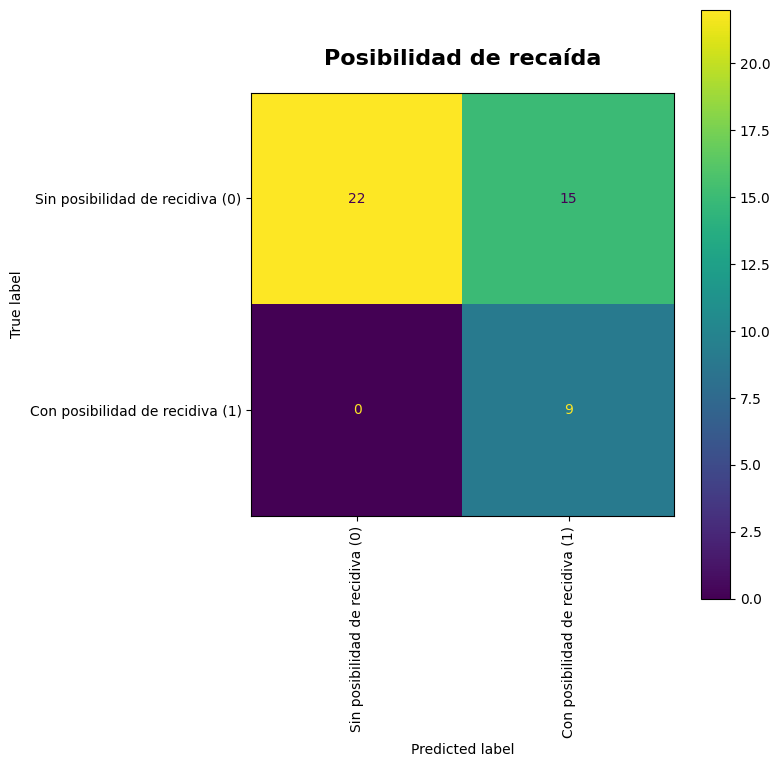

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))

ConfusionMatrixDisplay.from_estimator(
    modelo_recuperado, 
    test_pca_final[:, :3], 
    y_test_final, 
    ax=ax,
    display_labels=['Sin posibilidad de recidiva (0)', 'Con posibilidad de recidiva (1)']
)

ax.set_title('Posibilidad de recaída', fontsize=16, fontweight='bold', pad=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()